In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from sklearn.metrics import silhouette_score,calinski_harabasz_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
airlines_data=pd.read_excel('EastWestAirlines.xlsx',1)
airlines_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


### EDA:

In [3]:
airlines_data.shape

(3999, 12)

In [4]:
airlines_data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
airlines_data.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [6]:
airlines_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
airlines_data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [8]:
airlines_data['Award?'].value_counts()

0    2518
1    1481
Name: Award?, dtype: int64

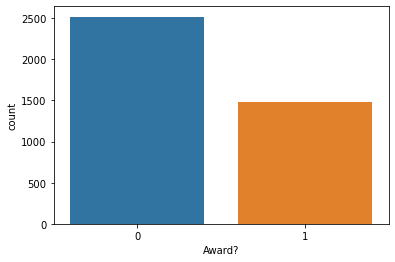

In [9]:
sns.countplot(airlines_data['Award?'])
plt.show()

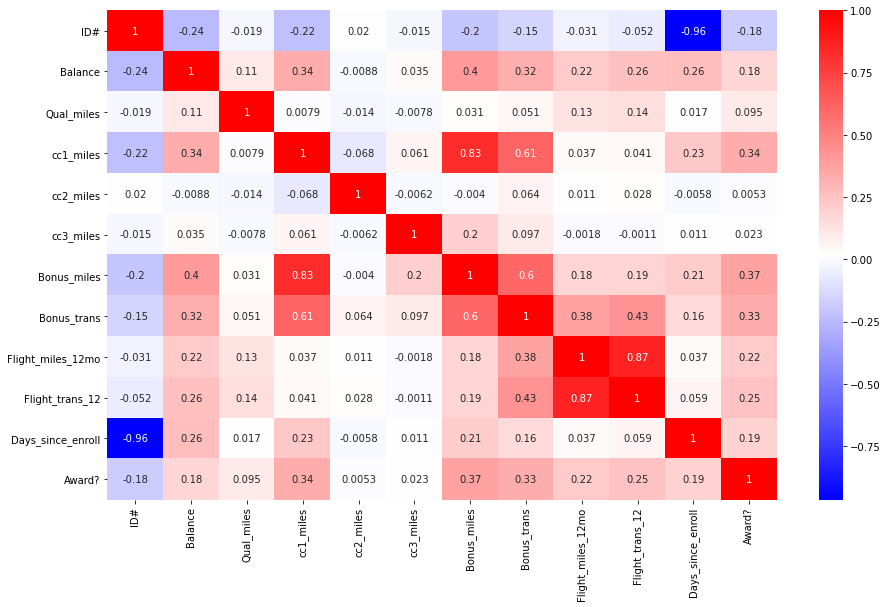

In [10]:
corr=airlines_data.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr,annot=True,cmap='bwr')
plt.show()

### Scaling the data

In [11]:
#Normalization
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [12]:
airlines_norm=norm_func(airlines_data.iloc[:,1:])
airlines_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


### CLUSTERING
### Hierarchical

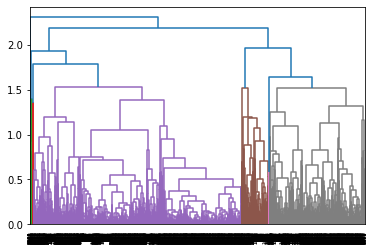

In [13]:
#create dendrogram
dendrogram=sch.dendrogram(sch.linkage(airlines_norm,method='complete'))

In [19]:
#create clusters
hc= AgglomerativeClustering(n_clusters=4,affinity='euclidean')
hc

AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [20]:
#save clusters for chart
y_hc=hc.fit_predict(airlines_norm)
y_hc

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [21]:
clusters=pd.DataFrame(y_hc,columns=['clusters'])
clusters.head(50)

,clusters
0,0
1,0
2,0
3,0
4,3
5,0
6,2
7,1
8,1
9,1


In [22]:
airlines_data['cluster_hc']= clusters
airlines_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_hc
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [24]:
airlines_data[airlines_data['cluster_hc']==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_hc
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,4013,11310,0,1,1,1,5021,2,0,0,1409,0,0
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,0
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [ ]:
airlines_data[airlines_data['clusters']==1]

In [ ]:
airlines_data[airlines_data['clusters']==2]

In [ ]:
airlines_data[airlines_data['clusters']==3]

In [ ]:
#plot the clusters
plt.figure(figsize=(10,7))
plt.scatter(airlines_data['clusters'],airlines_data['Balance'],c=hc.labels_)
plt.show()

## K Mean

### 1.Elbow Method

In [ ]:
wc=[]
for i in range(1,11):
    model_kmean=KMeans(n_clusters=i,random_state=99)
    model_kmean1=model_kmean.fit(airlines_norm)
    wc.append(model_kmean1.inertia_)
wc

In [ ]:
plt.scatter(range(1,11),wc)
plt.plot(range(1,11),wc)
plt.show()

#### Let's take no of cluster as 3 as there is less drop after 3

### 2.Silhouette score

In [ ]:
value=[]
for i in range(2,10):
    model1=KMeans(n_clusters=i,random_state=99)
    cluster_labels=model1.fit_predict(airlines_norm)
    silhouette_avg=silhouette_score(airlines_norm,cluster_labels)
    value.append(silhouette_avg)
value

In [ ]:
plt.scatter(range(2,10),value)
plt.plot(range(2,10),value)
plt.show()

In [ ]:
max(value)

#### Silhouette score for K-value 2 is higher in the list 

### 3.Calinski harabasz score

In [ ]:
cal=[]
for i in range(2,10):
    model2=KMeans(n_clusters=i,random_state=99)
    model2=model2.fit_predict(airlines_norm)
    cal.append(calinski_harabasz_score(airlines_norm,model2))
cal

In [ ]:
plt.scatter(range(2,10),cal)
plt.plot(range(2,10),cal)
plt.show()

#### calinski harabasz score says optimal number of cluster is 2

In [ ]:
kmean_model=KMeans(n_clusters=2,random_state=12)
cluster=kmean_model.fit_predict(airlines_norm)
cluster

In [ ]:
cluster=pd.DataFrame(cluster,columns=['cluster'])
cluster

In [ ]:
airlines_data['cluster_Kmean']=cluster
airlines_data

### DBSCAN

In [ ]:
dbscan=DBSCAN(min_samples=2,eps=0.5)
class_db=dbscan.fit_predict(airlines_norm)
class_db

In [ ]:
cluster=pd.DataFrame(class_db,columns=['cluster'])
cluster

In [ ]:
airlines_data['cluster_DB']=cluster
airlines_data

In [ ]:
plt.figure(figsize=(12,7))
plt.scatter(airlines_data2['Flight_miles_12mo'],airlines_data2['Flight_trans_12'],c=class_db,cmap=plt.cm.rainbow_r)
plt.show()